In [49]:
import os
from os import path

import sklearn
from sklearn.svm import SVC
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [50]:
train_dir = 'C:/Prabal/projects/fruit and vegitable detection/train'
valid_dir = 'C:/Prabal/projects/fruit and vegitable detection/validation'
test_dir = 'C:/Prabal/projects/fruit and vegitable detection/test'

In [51]:
total_file=0
for root,dirs,files in os.walk(train_dir):
    for file in files:
        total_file+=1
    print("no of file {} in {}".format(len(files),root))
print("Total files = ",total_file)

no of file 0 in C:/Prabal/projects/fruit and vegitable detection/train
no of file 68 in C:/Prabal/projects/fruit and vegitable detection/train\apple
no of file 75 in C:/Prabal/projects/fruit and vegitable detection/train\banana
no of file 88 in C:/Prabal/projects/fruit and vegitable detection/train\beetroot
no of file 90 in C:/Prabal/projects/fruit and vegitable detection/train\bell pepper
no of file 92 in C:/Prabal/projects/fruit and vegitable detection/train\cabbage
no of file 89 in C:/Prabal/projects/fruit and vegitable detection/train\capsicum
no of file 82 in C:/Prabal/projects/fruit and vegitable detection/train\carrot
no of file 79 in C:/Prabal/projects/fruit and vegitable detection/train\cauliflower
no of file 87 in C:/Prabal/projects/fruit and vegitable detection/train\chilli pepper
no of file 87 in C:/Prabal/projects/fruit and vegitable detection/train\corn
no of file 94 in C:/Prabal/projects/fruit and vegitable detection/train\cucumber
no of file 84 in C:/Prabal/projects/fru

In [52]:
def get_file_name(path):
    return os.listdir(path)
class_name=get_file_name(train_dir)
print(class_name)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [53]:
def transform_dt(directory):
    data=[]
    count=0
    for category in class_name:
        path=os.path.join(directory,category)
        label=class_name.index(category)

        for img in os.listdir(path):
            imgpath=os.path.join(path,img)
            image=cv2.imread(imgpath,0)
            try:
                image=cv2.resize(image,(100,100))
                images=np.array(image).flatten()
                data.append([images,label])
            except Exception as e:
                count+=1
                pass
    return data

In [54]:
train_ds=transform_dt(train_dir)
valid_ds=transform_dt(valid_dir)
test_ds=transform_dt(test_dir)
print(len(train_ds))
print(len(valid_ds))
print(len(test_ds))

3114
351
359


In [55]:
print(train_ds[1000])
print(train_ds[1000][0])

[array([42, 47, 61, ..., 17, 17, 13], dtype=uint8), 11]
[42 47 61 ... 17 17 13]


10000
image = [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


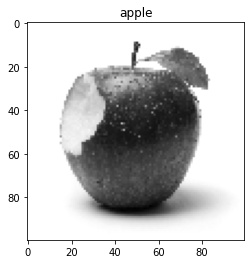

10000
image = [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


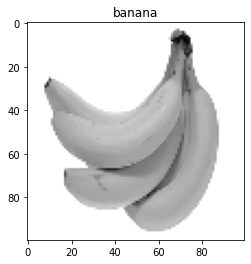

10000
image = [[208 218 209 ... 220 221 220]
 [208 205 215 ... 222 222 222]
 [211 206 206 ... 223 223 220]
 ...
 [198 199 195 ... 177 173 176]
 [197 198 201 ... 180 180 182]
 [188 192 194 ... 186 186 186]]


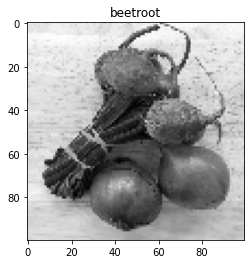

10000
image = [[ 32  30  32 ...   7  10  12]
 [ 24  30  26 ...  13  11   8]
 [ 21  29  29 ...  97  18  12]
 ...
 [173 178 169 ...  16  14  12]
 [160 186 187 ...  11  12  18]
 [114 116 118 ...  15  14  16]]


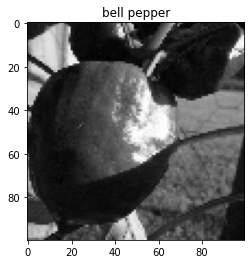

10000
image = [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


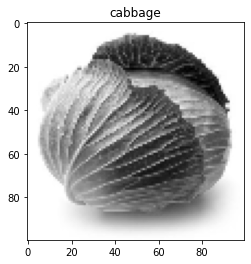

In [56]:
# plt.figure(figsize=(25,20))
for i in range(0,500,100):
    image=train_ds[i][0]
    print(len(image))
    img = image.reshape(100,100)
    print("image =", img)
    plt.imshow(img,cmap='gray')
    plt.title(class_name[train_ds[i][1]])
    plt.show()

In [71]:
train_feature=[]
train_label=[]
for feature, label in train_ds:
    train_feature.append(feature)
    train_label.append(label)
valid_feature=[]
valid_label=[]
for feature, label in valid_ds:
    valid_feature.append(feature)
    valid_label.append(label)
test_feature=[]
test_label=[]
for feature, label in test_ds:
    test_feature.append(feature)
    test_label.append(label)

In [72]:
# from sklearn import preprocessing


In [59]:
# def scaling(data):
#     data=preprocessing.scale(data)
#     return data

In [60]:
# train_feature=scaling(train_feature)
# # train_label=scaling(train_label)
# valid_feature=scaling(valid_feature)
# # valid_label=scaling(valid_label)
# test_feature=scaling(test_feature)
# # test_label=scaling(test_label)
# print(train_label[0])

0


In [73]:
model= SVC(C=1,kernel='poly',gamma='auto')
model.fit(train_feature,train_label)


accuracy=model.score(valid_feature,valid_label)
print("accuracy = ",accuracy)



accuracy =  0.9601139601139601


In [ ]:
import random
prediction=model.predict(test_feature)
print(prediction)
print(len(prediction))
x=0
while x<10:
    i=random.randint(0,359)
    predict_image=test_feature[i]
    img = predict_image.reshape(100,100)
    print("image =", img)
    plt.imshow(img,cmap='gray')
    plt.title(class_name[prediction[i]])
    plt.show()
    print("prediction =",class_name[prediction[i]])
    x+=1

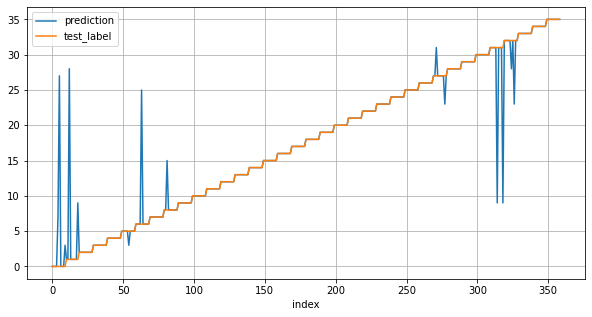

In [75]:
plt.figure(figsize=(10,5))
plt.plot(prediction)
plt.plot(test_label)
plt.grid(True)
plt.legend(['prediction', 'test_label'])
plt.xlabel('index')
plt.show()